In [1]:
#Importing necessary libraries - 
import numpy as np
import pandas as pd

import re
from nltk import sent_tokenize, word_tokenize 
import gensim.models.word2vec as w2v 

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

pd.set_option('display.max_colwidth', 2000)
from sklearn.metrics.pairwise import cosine_similarity

In [447]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [493]:
from sklearn.model_selection import train_test_split

In [526]:
from sklearn.ensemble import RandomForestClassifier

In [543]:
from sklearn.model_selection import GridSearchCV

In [641]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,precision_score,recall_score

In [178]:
# Creating a dataframe to store the names of all the variables(objects) created 
variable_names = pd.DataFrame(columns = ['Name','info'] )

In [179]:
variable_names

,Name,info


In [2]:
#Function to read each category inependently - 
def read_data(cat,n):
    sent = []
    for i in range(1,int(n)+1):
        if(i<10):
            ad = "00" + str(i)
        elif(i<100):
            ad = "0" + str(i)
        
        else:
            ad = str(i)
        f = open("BBC News Summary/News Articles/"+ cat +"/"+ad+".txt")
        n = ""
        for line in f: 
            n += line
        sent.append(n)
    return sent

In [3]:
# Making a seperate  corpus for each category - 
sentence_sport = read_data('sport',511)
sentence_tech = read_data('tech',401)
sentence_politics = read_data('politics',417)
sentence_business = read_data('business',510)
sentence_entertainment = read_data('entertainment',386)



In [181]:
variable_names= variable_names.append(pd.DataFrame({'Name':['sentence_sport','sentence_tech','sentence_politics',
                                            'sentence_business','sentence_entertainment'],
                                    'info': 'Corpus file'}))


In [182]:
variable_names

,Name,info
0,sentence_sport,Corpus file
1,sentence_tech,Corpus file
2,sentence_politics,Corpus file
3,sentence_business,Corpus file
4,sentence_entertainment,Corpus file


In [4]:
sentence_sport[0]

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

In [5]:
sentence_tech[0]

'Ink helps drive democracy in Asia\n\nThe Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country\'s elections as part of a drive to prevent multiple voting.\n\nThis new technology is causing both worries and guarded optimism among different sectors of the population. In an effort to live up to its reputation in the 1990s as "an island of democracy", the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections. The US government agreed to fund all expenses associated with this decision.\n\nThe Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies. The use of ink is only one part of a general effort to show commitment towards more open elections - the German Embassy

In [8]:
# Function to store summary sentences for each title - (Input similar to read_data func)
# Return a dictionary 
def read_data_summary(cat,n):
  
    summary_dict = {}
    for i in range(1,int(n)+1):
        sent = ''
        if(i<10):
            ad = "00" + str(i)
        elif(i<100):
            ad = "0" + str(i)
        
        else:
            ad = str(i)
        f = open("BBC News Summary/Summaries/"+ cat +"/"+ad+".txt")
        #n = []
        for line in f: 
            sent = sent+line
            #sent.append(line)
        
        summary_dict[int(ad)] = [re.sub('"','',i) for i in sent.split(".") if i !='']
    
    return (summary_dict)

In [9]:
# Creating summary sentences dictionary for each each title , category wise- 

summary_dict_sport = read_data_summary('sport',511)
summary_dict_tech = read_data_summary('tech',401)
summary_dict_politics = read_data_summary('politics',417)
summary_dict_business = read_data_summary('business',510)
summary_dict_entertainment = read_data_summary('entertainment',386)

In [183]:
variable_names= variable_names.append(pd.DataFrame({'Name':['summary_dict_sport','summary_dict_tech','summary_dict_politics',
                                            'summary_dict_business','summary_dict_entertainment'],
                                    'info': 'Dictionary file- Key = file_no,values=Summary sentences'}),ignore_index=True)


In [184]:
variable_names

,Name,info
0,sentence_sport,Corpus file
1,sentence_tech,Corpus file
2,sentence_politics,Corpus file
3,sentence_business,Corpus file
4,sentence_entertainment,Corpus file
5,summary_dict_sport,"Dictionary file- Key = file_no,values=Summary sentences"
6,summary_dict_tech,"Dictionary file- Key = file_no,values=Summary sentences"
7,summary_dict_politics,"Dictionary file- Key = file_no,values=Summary sentences"
8,summary_dict_business,"Dictionary file- Key = file_no,values=Summary sentences"
9,summary_dict_entertainment,"Dictionary file- Key = file_no,values=Summary sentences"


Preview of Summary dictionaries - 

In [12]:
summary_dict_sport[1]

['For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form',
 'Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage',
 "British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid",
 'Claxton will see if her new training regime pays dividends at the European Indoors which take place on 5-6 March',
 'I am quite confident, said Claxton']

In [13]:
summary_dict_tech[1]

['The other common type of ink in elections is indelible visible ink - but as the elections in Afghanistan showed, improper use of this type of ink can cause additional problems',
 'The use of ink and readers by itself is not a panacea for election ills',
 'The use of invisible ink is not without its own problems',
 'The use of ink is only one part of a general effort to show commitment towards more open elections - the German Embassy, the Soros Foundation and the Kyrgyz government have all contributed to purchase transparent ballot boxes',
 'The author of one such article began a petition drive against the use of the ink',
 'The use of ink has been controversial - especially among groups perceived to be pro-government',
 'In an effort to live up to its reputation in the 1990s as an island of democracy, the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections',
 "At the entrance to each polling stati

Checkpoint 1! 

In [35]:
# Function to make thematic words dictionary,tokens dictionary,word count dictionary for all the categories combined 
# Takes the corpus as argument, and then adds the info to a common dictionary 
them_dict={}
token_dict={}
word_count_dict={}

def token_func(corpus):

    #them_dict={}
    #token_dict={}
    #word_count_dict={}
    lemmatizer = WordNetLemmatizer() 

    for i in corpus:
        title= i.split('\n')[0]
        
        file_no = 1
        body = i.split("\n")[1:]   # body is a list of sentences 
        
        clean = re.sub('[^a-zA-Z]',' ', " ".join(body))
        
        
        tokens = word_tokenize(clean)
        clean_list = list(lemmatizer.lemmatize(i).lower() for i in tokens if i.lower() not in stopwords.words('english') )
        thematic_words = list(pd.Series(clean_list).value_counts().keys()[:10])
        them_dict[title] = thematic_words
        total_words = len(clean_list)
        
        token_dict[title] = clean_list
        
        word_count_dict[title] = total_words
            
        file_no += 1
    return(them_dict,token_dict,word_count_dict)
       

In [36]:
# Adding sports corpus - 
them_dict,token_dict,word_count_dict = token_func(sentence_sport)  

In [187]:
variable_names= variable_names.append(pd.DataFrame({'Name':['them_dict','token_dict','word_count_dict'],
                                                    'info':['Dict file: key = title ,values = Thematic words for each title(includes all categories)',
                                                           'Dict file: key = title ,values = Tokens for each title(includes all categories)',
                                                           'Dict file: key = title ,values = Total no of tokens for each title(includes all categories)']},
                                                  ),ignore_index=True)

In [188]:
variable_names

,Name,info
0,sentence_sport,Corpus file
1,sentence_tech,Corpus file
2,sentence_politics,Corpus file
3,sentence_business,Corpus file
4,sentence_entertainment,Corpus file
5,summary_dict_sport,"Dictionary file- Key = file_no,values=Summary sentences"
6,summary_dict_tech,"Dictionary file- Key = file_no,values=Summary sentences"
7,summary_dict_politics,"Dictionary file- Key = file_no,values=Summary sentences"
8,summary_dict_business,"Dictionary file- Key = file_no,values=Summary sentences"
9,summary_dict_entertainment,"Dictionary file- Key = file_no,values=Summary sentences"


In [37]:
len(them_dict)

500

In [38]:
them_dict,token_dict,word_count_dict = token_func(sentence_tech)

In [39]:
len(them_dict)

833

In [40]:
len(token_dict)

833

In [48]:
them_dict,token_dict,word_count_dict = token_func(sentence_politics)

In [49]:
len(token_dict)

1230

In [50]:
them_dict,token_dict,word_count_dict = token_func(sentence_business)

In [51]:
them_dict,token_dict,word_count_dict = token_func(sentence_entertainment)

In [53]:
len(token_dict)

2096

In [52]:
# Function to find the number of thematic words in a sentence
def thematic_count(x,title):
    count=0
    for i in x:
        if i in them_dict[title]:
            count+=1
    
    return(count)

Checkpoint 2!!

In [54]:
#Function to generate the target label - (Binary)
def target_var(x,file_no,summary_dict):
    if x in summary_dict[file_no]:
        return(1)
    else:
        return(0)

In [55]:
# function to find length
def sent_length(x):
    return (len(x.split(' ')))

In [56]:
# function to create tokens from each sentence
def sent_wise_token(x):
    lemmatizer = WordNetLemmatizer()
    clean = re.sub('[^a-zA-Z]',' ', x)
    tokens = word_tokenize(clean)
    return(list(lemmatizer.lemmatize(i).lower() for i in tokens if i.lower() not in stopwords.words('english') ))    

In [310]:
#Function to create data frame from a corpus - 

def create_dataframe(corpus,summary_dict):    # Output from the read_data func
    main_data=pd.DataFrame(columns= ['Sentence','Title','Summary','Sentence_len','Sent_no'])   
    
    file_no= 1 
    sent_count_dict = {}

    for i in corpus:
        title= i.split('\n')[0]
       
        para= [k for k in i.split('\n')[1:] if k!=" "]
        
        #para = [k for k in ("".join(para)).split('.') if k!='']
        para = [ re.sub('"','',i) for i in " ".join(para).split('. ') if i !='']
       
                      
        
        count= 0          # counter for no of sentences
        
                
        for j in para:
        
            add_sent = [ re.sub('\.$',' ',i).strip() for i in j.split('. ') ]
            if len(add_sent)==1:
                
                new= pd.DataFrame({'Sentence':[ re.sub('\.$',' ',i).strip() for i in j.split('. ') if i!=""],'Title':title,
                                  'Sent_no' : count + 1})
            else:
      
                new=pd.DataFrame({'Sentence':[ re.sub('\.$',' ',i).strip() for i in j.split('. ')if i!=""],'Title':title,
                                  'Sent_no' : [ count+1 for i in j.split('. ') if i!="" ]})
                count=count+1
                
            new['Sentence_len'] = new.Sentence.apply(sent_length)
            
            new['Summary'] = new.Sentence.apply(target_var, args=(file_no,summary_dict,))
            
            new['Sent_tokens'] = new.Sentence.apply(sent_wise_token)
            
            new['Thematic_count'] = new.Sent_tokens.apply(thematic_count,args=(title,))
            
                
                       
            main_data = main_data.append(new,ignore_index= True, sort=False)
            count = count + 1
        
                  
        sent_count_dict[title] = count
        file_no += 1 
        
    main_data['Thematic_count_norm'] = main_data.Thematic_count/main_data.Sentence_len  
        
         
            
    return (main_data,sent_count_dict) # return dataframe , and sentence count dictionary 

In [354]:
main_data_sport,sent_count_dict_sport= create_dataframe(sentence_sport,summary_dict_sport)

In [355]:
main_data_sport.head(2)

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm
0,British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid,Claxton hunting first major medal,1,21,1,"[british, hurdler, sarah, claxton, confident, win, first, major, medal, next, month, european, indoor, championships, madrid]",5.0,0.238095
1,"The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title",Claxton hunting first major medal,0,26,2,"[year, old, already, smashed, british, record, hurdle, twice, season, setting, new, mark, second, win, aaas, title]",4.0,0.153846


In [356]:
main_data_sport[main_data_sport.Sentence==""]

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm
585,,Radcliffe enjoys winning comeback,0,1,12,[],0.0,0
3511,,Gallas sees two-horse race,1,1,16,[],0.0,0
6490,,Ireland 21-19 Argentina,0,1,20,[],0.0,0
6501,,England claim Dubai Sevens glory,0,1,11,[],0.0,0


In [357]:
#There are some null sentences, finding the respective titles , and then reducing the number of sentence by one 

title_null_sent = main_data_sport.loc[main_data_sport[main_data_sport.Sentence==""].index,'Title']

In [358]:
title_null_sent.index

Int64Index([585, 3511, 6490, 6501], dtype='int64')

In [359]:
main_data_sport.loc[title_null_sent.index]

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm
585,,Radcliffe enjoys winning comeback,0,1,12,[],0.0,0
3511,,Gallas sees two-horse race,1,1,16,[],0.0,0
6490,,Ireland 21-19 Argentina,0,1,20,[],0.0,0
6501,,England claim Dubai Sevens glory,0,1,11,[],0.0,0


In [360]:
for i in title_null_sent.value_counts().keys():
    sent_count_dict_sport[i] = sent_count_dict_sport[i] - title_null_sent.value_counts()[i] 

In [361]:
sent_count_dict_sport['Radcliffe enjoys winning comeback']

11

In [362]:
main_data_sport[main_data_sport.Sentence==""]

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm
585,,Radcliffe enjoys winning comeback,0,1,12,[],0.0,0
3511,,Gallas sees two-horse race,1,1,16,[],0.0,0
6490,,Ireland 21-19 Argentina,0,1,20,[],0.0,0
6501,,England claim Dubai Sevens glory,0,1,11,[],0.0,0


In [363]:
main_data_sport = main_data_sport.drop(index=title_null_sent.index,axis=0)  # Removing blank sentences

In [364]:
main_data_sport.reset_index(inplace=True,drop=True)

In [365]:
main_data_sport[main_data_sport.Sentence==""]

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm


In [367]:
main_data_tech,sent_count_dict_tech = create_dataframe(sentence_tech,summary_dict_tech)


In [368]:
#Function to remove NULL sentences and update the Sent count dictionary 
def remove_null(dataframe,sent_count_dict):
    title_null_sent = dataframe.loc[dataframe[dataframe.Sentence==""].index,'Title']
    
    for i in title_null_sent.value_counts().keys():
        sent_count_dict[i] = sent_count_dict[i] - title_null_sent.value_counts()[i] 
    
    dataframe = dataframe.drop(index=title_null_sent.index,axis=0)  # Removing blank sentences
    dataframe.reset_index(inplace=True,drop=True)

In [369]:
remove_null(main_data_tech,sent_count_dict_tech)

In [371]:
main_data_tech.tail()

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm
9524,Most MMORPG games you need a credit card to play but I dont think parents know just what they are letting there children into,Losing yourself in online gaming,1,24,138,"[mmorpg, game, need, credit, card, play, dont, think, parent, know, letting, child]",2.0,0.0833333
9525,"Unless there is undeniable medical proof that staring at a computer screens for hours at a time can damage a person&#191;s health, you can expect this not to decline but to get worse",Losing yourself in online gaming,0,33,139,"[unless, undeniable, medical, proof, staring, computer, screen, hour, time, damage, person, health, expect, decline, get, worse]",2.0,0.0606061
9526,These people are pathetic,Losing yourself in online gaming,0,4,140,"[people, pathetic]",1.0,0.25
9527,They need to get off their machines and notice that our world is being swiftly overcome by issues and troubles that make the trifling worries of and online universe absolutely meaningless,Losing yourself in online gaming,0,31,141,"[need, get, machine, notice, world, swiftly, overcome, issue, trouble, make, trifling, worry, online, universe, absolutely, meaningless]",2.0,0.0645161
9528,"24hours, when i was a kid at school and i was on half term, Ultima Online was the game, ahhhh them was the days ! LOL",Losing yourself in online gaming,0,26,142,"[hour, kid, school, half, term, ultima, online, game, ahhhh, day, lol]",3.0,0.115385


In [372]:
main_data_tech.shape

(9529, 8)

In [373]:
main_data_politics,sent_count_dict_politics = create_dataframe(sentence_politics,summary_dict_politics)
remove_null(main_data_politics,sent_count_dict_politics)

In [374]:
main_data_business,sent_count_dict_business = create_dataframe(sentence_business,summary_dict_business)
remove_null(main_data_business,sent_count_dict_business)

In [375]:
main_data_entertainment,sent_count_dict_entertainment = create_dataframe(sentence_entertainment,summary_dict_entertainment)
remove_null(main_data_entertainment,sent_count_dict_entertainment)

In [189]:
variable_names= variable_names.append(pd.DataFrame({'Name':['main_data_sport','main_data_tech','main_data_politics',
                                                            'main_data_business','main_data_entertainment'],
                                                    'info':'Data Frame for each category'},
                                                  ),ignore_index=True)

In [190]:
variable_names= variable_names.append(pd.DataFrame({'Name':['sent_count_dict_sport','sent_count_dict_tech','sent_count_dict_politics',
                                                            'sent_count_dict_business','sent_count_dict_entertainment'],
                                                    'info':'Dict for each category- key= Title , values =No of sentences in each title'},
                                                  ),ignore_index=True)

In [191]:
variable_names

,Name,info
0,sentence_sport,Corpus file
1,sentence_tech,Corpus file
2,sentence_politics,Corpus file
3,sentence_business,Corpus file
4,sentence_entertainment,Corpus file
5,summary_dict_sport,"Dictionary file- Key = file_no,values=Summary sentences"
6,summary_dict_tech,"Dictionary file- Key = file_no,values=Summary sentences"
7,summary_dict_politics,"Dictionary file- Key = file_no,values=Summary sentences"
8,summary_dict_business,"Dictionary file- Key = file_no,values=Summary sentences"
9,summary_dict_entertainment,"Dictionary file- Key = file_no,values=Summary sentences"


In [376]:
main_data_sport.head()

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm
0,British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid,Claxton hunting first major medal,1,21,1,"[british, hurdler, sarah, claxton, confident, win, first, major, medal, next, month, european, indoor, championships, madrid]",5.0,0.238095
1,"The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title",Claxton hunting first major medal,0,26,2,"[year, old, already, smashed, british, record, hurdle, twice, season, setting, new, mark, second, win, aaas, title]",4.0,0.153846
2,"I am quite confident, said Claxton",Claxton hunting first major medal,1,6,3,"[quite, confident, said, claxton]",2.0,0.333333
3,But I take each race as it comes,Claxton hunting first major medal,0,8,4,"[take, race, come]",1.0,0.125
4,As long as I keep up my training but not do too much I think there is a chance of a medal,Claxton hunting first major medal,0,22,5,"[long, keep, training, much, think, chance, medal]",2.0,0.0909091


In [377]:
main_data_tech.head()

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm
0,"The Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country's elections as part of a drive to prevent multiple voting",Ink helps drive democracy in Asia,1,32,1,"[kyrgyz, republic, small, mountainous, state, former, soviet, republic, using, invisible, ink, ultraviolet, reader, country, election, part, drive, prevent, multiple, voting]",4.0,0.125
1,This new technology is causing both worries and guarded optimism among different sectors of the population,Ink helps drive democracy in Asia,0,16,2,"[new, technology, causing, worry, guarded, optimism, among, different, sector, population]",0.0,0
2,"In an effort to live up to its reputation in the 1990s as an island of democracy, the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections",Ink helps drive democracy in Asia,1,38,3,"[effort, live, reputation, island, democracy, kyrgyz, president, askar, akaev, pushed, law, requiring, use, ink, upcoming, parliamentary, presidential, election]",4.0,0.105263
3,The US government agreed to fund all expenses associated with this decision,Ink helps drive democracy in Asia,0,12,4,"[us, government, agreed, fund, expense, associated, decision]",0.0,0
4,"The Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies",Ink helps drive democracy in Asia,0,37,5,"[kyrgyz, republic, seen, many, expert, backsliding, high, point, reached, mid, hastily, pushed, referendum, reducing, legislative, branch, one, chamber, deputy]",2.0,0.0540541


In [378]:
main_data_politics.head()

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm
0,"Maternity pay for new mothers is to rise by Â£1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt",Labour plans maternity pay rise,0,24,1,"[maternity, pay, new, mother, rise, part, new, proposal, announced, trade, industry, secretary, patricia, hewitt]",5.0,0.208333
1,"It would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme",Labour plans maternity pay rise,0,19,2,"[would, mean, paid, leave, would, increased, nine, month, ms, hewitt, told, gmtv, sunday, programme]",3.0,0.157895
2,Other plans include letting maternity pay be given to fathers and extending rights to parents of older children,Labour plans maternity pay rise,1,18,3,"[plan, include, letting, maternity, pay, given, father, extending, right, parent, older, child]",3.0,0.166667
3,"The Tories dismissed the maternity pay plan as desperate, while the Liberal Democrats said it was misdirected",Labour plans maternity pay rise,1,17,4,"[tories, dismissed, maternity, pay, plan, desperate, liberal, democrats, said, misdirected]",4.0,0.235294
4,"Ms Hewitt said: We have already doubled the length of maternity pay, it was 13 weeks when we were elected, we have already taken it up to 26 weeks",Labour plans maternity pay rise,1,29,5,"[ms, hewitt, said, already, doubled, length, maternity, pay, week, elected, already, taken, week]",3.0,0.103448


In [379]:
main_data_business.head()

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm
0,"Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier",Ad sales boost Time Warner profit,0,21,1,"[quarterly, profit, us, medium, giant, timewarner, jumped, bn, three, month, december, year, earlier]",4.0,0.190476
1,"The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales",Ad sales boost Time Warner profit,0,23,2,"[firm, one, biggest, investor, google, benefited, sale, high, speed, internet, connection, higher, advert, sale]",3.0,0.130435
2,TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn,Ad sales boost Time Warner profit,0,11,3,"[timewarner, said, fourth, quarter, sale, rose, bn, bn]",6.0,0.545455
3,"Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL",Ad sales boost Time Warner profit,1,20,4,"[profit, buoyed, one, gain, offset, profit, dip, warner, bros, le, user, aol]",3.0,0.15
4,Time Warner said on Friday that it now owns 8% of search-engine Google,Ad sales boost Time Warner profit,0,13,5,"[time, warner, said, friday, owns, search, engine, google]",1.0,0.0769231


In [380]:
main_data_entertainment.head()

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm
0,A Christmas tree that can receive text messages has been unveiled at London's Tate Britain art gallery,Gallery unveils interactive tree,1,17,1,"[christmas, tree, receive, text, message, unveiled, london, tate, britain, art, gallery]",5.0,0.294118
1,The spruce has an antenna which can receive Bluetooth texts sent by visitors to the Tate,Gallery unveils interactive tree,1,16,2,"[spruce, antenna, receive, bluetooth, text, sent, visitor, tate]",3.0,0.1875
2,"The messages will be unwrapped by sculptor Richard Wentworth, who is responsible for decorating the tree with broken plates and light bulbs",Gallery unveils interactive tree,1,22,3,"[message, unwrapped, sculptor, richard, wentworth, responsible, decorating, tree, broken, plate, light, bulb]",5.0,0.227273
3,It is the 17th year that the gallery has invited an artist to dress their Christmas tree,Gallery unveils interactive tree,1,17,4,"[th, year, gallery, invited, artist, dress, christmas, tree]",3.0,0.176471
4,Artists who have decorated the Tate tree in previous years include Tracey Emin in 2002,Gallery unveils interactive tree,0,15,5,"[artists, decorated, tate, tree, previous, year, include, tracey, emin]",2.0,0.133333


Checkpoint !!!

In [383]:
#  Function to normalize sentnece length within a file | to be used after the main_data is created 
def normal_sen_length(x,title,dataframe):   
    high = max(dataframe.groupby('Title').get_group(title)['Sentence_len'])
    return (x/high)

   

In [384]:
# Function to score a sentence on the basis of its position in the text  WORKS 
def sent_pos(x,title,sent_count_dict):
    
    no_sent = sent_count_dict[title]
    mid = no_sent/2 + 0.3
    if (x == 1) or (x == no_sent):   # if the sentence is first or last return 1 
        return(1)
    else : 
        if x < mid:
            return(np.cos((1-x)*((1/no_sent)-mid)))
            
        elif x> mid:
            return(np.cos((no_sent-x)*((1/11)-mid)))


In [385]:
# Function to create a dictionary with title as key and the top15 nouns as items  
# To be used to find no of top nouns present in each sentence 
top_noun_dict = {} 
def top_nouns(token_dict):
           
    for i in token_dict.keys():
        
        pos = nltk.pos_tag(token_dict[i])
        count=0
        noun_list=[]
        for a,b in pos:
            if (b=="NN") or (b=="NNS") or (b=="NNP") or (b=="NNPS"):
                count+=1
                noun_list.append(a)
        top_15 = list(pd.Series(noun_list).value_counts().keys()[:15])    
            
        top_noun_dict[i] = top_15 
    return(top_noun_dict)   

In [386]:
top_noun_dict= top_nouns(token_dict)

In [195]:
variable_names=variable_names.append(pd.DataFrame({'Name':['top_noun_dict'],'info':'Dict file- key= Title, values = Top 15 noun for each title'}),
                                    ignore_index=True)

In [196]:
variable_names

,Name,info
0,sentence_sport,Corpus file
1,sentence_tech,Corpus file
2,sentence_politics,Corpus file
3,sentence_business,Corpus file
4,sentence_entertainment,Corpus file
5,summary_dict_sport,"Dictionary file- Key = file_no,values=Summary sentences"
6,summary_dict_tech,"Dictionary file- Key = file_no,values=Summary sentences"
7,summary_dict_politics,"Dictionary file- Key = file_no,values=Summary sentences"
8,summary_dict_business,"Dictionary file- Key = file_no,values=Summary sentences"
9,summary_dict_entertainment,"Dictionary file- Key = file_no,values=Summary sentences"


In [388]:
len(token_dict)

2096

In [389]:
len(top_noun_dict)

2096

In [390]:
# Function to extract features from the base data frame  # works 
# Doesn't return anything ,modifies the data frame used as argument
def features_(dataframe,sent_count_dict):
    
    dataframe['Norm_sent_length'] =0
    dataframe['Sent_pos_norm'] = 0 
    dataframe['No_top_noun_norm'] = 0 
    
    
    for i in dataframe.index:
        title = dataframe['Title'][i]
        
        dataframe.loc[i,'Norm_sent_length'] = normal_sen_length(dataframe.Sentence_len[i],title,dataframe)  
                                                                           
        dataframe.loc[i,'Sent_pos_norm'] = sent_pos(dataframe.Sent_no[i],title,sent_count_dict)
        
        nn = [a for a in dataframe.loc[i,'Sent_tokens'] if a in top_noun_dict[dataframe.loc[i,'Title']]]  
        dataframe.loc[i,'No_top_noun_norm'] = len(nn)/dataframe.loc[i,'Sentence_len']

In [391]:
features_(main_data_sport,sent_count_dict_sport)

In [392]:
features_(main_data_tech,sent_count_dict_tech)

In [393]:
features_(main_data_politics,sent_count_dict_politics)

In [394]:
features_(main_data_business,sent_count_dict_business)

In [395]:
features_(main_data_entertainment,sent_count_dict_entertainment)

In [396]:
main_data_sport.head(2)

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm,Norm_sent_length,Sent_pos_norm,No_top_noun_norm
0,British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid,Claxton hunting first major medal,1,21,1,"[british, hurdler, sarah, claxton, confident, win, first, major, medal, next, month, european, indoor, championships, madrid]",5.0,0.238095,0.807692,1.000000,0.190476
1,"The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title",Claxton hunting first major medal,0,26,2,"[year, old, already, smashed, british, record, hurdle, twice, season, setting, new, mark, second, win, aaas, title]",4.0,0.153846,1.000000,0.839684,0.269231


Checkpoint !!

## Word2 VEC model implementation - 

In [397]:
num_features = 100   # no of dimensions
min_word_count = 10  # criteria 
context_size = 3     # window size
downsampling = 1e-3
seed=1000            # random seed

In [398]:
word2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

Functions to create doument level embeddings from word embeddings by average- 

In [399]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64") 
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

In [400]:
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [401]:
word2vec.build_vocab(token_dict.values()) 

In [402]:
print('Word2Vec vocabulary length:', len(word2vec.wv.vocab))
print("Documents:", word2vec.corpus_count)

Word2Vec vocabulary length: 5736
Documents: 2096


In [403]:
word2vec.train(token_dict.values(), total_examples=word2vec.corpus_count, epochs=word2vec.epochs)

(1913012, 2232595)

In [404]:
# get document level embeddings to be used in modeling 
w2v_feature_array = averaged_word_vectorizer(corpus=main_data_sport['Sent_tokens'], model=word2vec,   #function to get vectors
                                             num_features=num_features)
vector_df_sport= pd.DataFrame(w2v_feature_array)  # dataframe 

C:\Users\rp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [405]:
# get document level embeddings to be used in modeling 
w2v_feature_array = averaged_word_vectorizer(corpus=main_data_tech['Sent_tokens'], model=word2vec,   #function to get vectors
                                             num_features=num_features)
vector_df_tech= pd.DataFrame(w2v_feature_array)  # dataframe 

C:\Users\rp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [409]:
vector_df_sport.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.515983,0.084560,0.129212,-0.173141,0.035930,0.213185,-0.030054,-0.029890,0.037256,0.012544,...,-0.122754,0.123235,-0.092908,0.530242,0.131693,0.131590,0.111715,-0.027947,-0.016871,0.127335
1,-0.464416,0.229689,0.109913,-0.221998,0.086589,0.183555,-0.012466,-0.070960,0.039257,0.030102,...,-0.240201,0.091528,-0.096516,0.433443,0.118160,0.147319,0.167864,-0.097364,0.092007,0.118312
2,-0.317820,0.181834,0.333400,-0.033570,0.127333,0.429534,-0.181011,-0.166992,0.164867,-0.020181,...,-0.033546,-0.017858,0.017572,0.367749,0.068851,0.134343,0.117725,0.154078,0.192073,0.007099
3,-0.392956,0.273047,0.181701,-0.157584,-0.088705,0.147133,-0.113166,-0.041116,0.091648,0.062943,...,-0.225280,0.029737,-0.188004,0.434711,0.084066,0.302131,0.126363,0.061627,0.225917,-0.101479
4,-0.431828,0.294369,0.190404,-0.224207,-0.017567,0.314426,-0.167363,-0.243903,0.079288,-0.002162,...,-0.151252,0.086315,-0.062254,0.349998,0.093205,0.164247,0.183067,0.167401,0.252012,0.034752


In [410]:
vector_df_tech.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.390092,0.092528,0.289281,-0.244863,-0.014091,0.183847,-0.192284,-0.026346,0.154612,-0.053360,...,-0.145950,0.034217,-0.036040,0.289099,0.057072,0.050947,0.178662,-0.029082,-0.019119,0.200983
1,-0.469936,0.142580,0.338346,-0.314490,0.022308,0.208672,-0.189448,-0.069037,0.219386,-0.156101,...,-0.058039,0.003372,-0.061966,0.245402,0.061116,-0.005235,0.245714,0.022515,0.063414,0.196080
2,-0.413447,0.104805,0.224787,-0.198381,-0.002469,0.243369,-0.154968,0.012168,0.156119,-0.038166,...,-0.192757,0.069846,-0.044658,0.278496,0.016530,0.113235,0.099849,0.038363,-0.015539,0.107614
3,-0.308551,0.053362,0.295427,-0.315132,-0.011905,0.328438,-0.216648,0.029682,0.159675,-0.025479,...,-0.084597,-0.061116,0.011061,0.208829,0.089060,-0.025154,0.220348,-0.013235,-0.124126,0.212590
4,-0.452029,0.128550,0.208731,-0.274361,0.023974,0.271625,-0.172091,-0.108232,0.154202,0.013482,...,-0.184657,0.117106,-0.042726,0.334764,0.075032,0.066526,0.169607,-0.044115,0.023457,0.174997


In [411]:
# get document level embeddings to be used in modeling 
w2v_feature_array = averaged_word_vectorizer(corpus=main_data_politics['Sent_tokens'], model=word2vec,   #function to get vectors
                                             num_features=num_features)
vector_df_politics= pd.DataFrame(w2v_feature_array)  # dataframe 

C:\Users\rp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [412]:
# get document level embeddings to be used in modeling 
w2v_feature_array = averaged_word_vectorizer(corpus=main_data_business['Sent_tokens'], model=word2vec,   #function to get vectors
                                             num_features=num_features)
vector_df_business= pd.DataFrame(w2v_feature_array)  # dataframe 

C:\Users\rp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [413]:
# get document level embeddings to be used in modeling 
w2v_feature_array = averaged_word_vectorizer(corpus=main_data_entertainment['Sent_tokens'], model=word2vec,   #function to get vectors
                                             num_features=num_features)
vector_df_entertainment= pd.DataFrame(w2v_feature_array)  # dataframe 

C:\Users\rp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [414]:
vector_df_sport.shape

(8653, 100)

In [415]:
main_data_sport.shape

(8653, 11)

In [241]:
variable_names

,Name,info
0,sentence_sport,Corpus file
1,sentence_tech,Corpus file
2,sentence_politics,Corpus file
3,sentence_business,Corpus file
4,sentence_entertainment,Corpus file
5,summary_dict_sport,"Dictionary file- Key = file_no,values=Summary sentences"
6,summary_dict_tech,"Dictionary file- Key = file_no,values=Summary sentences"
7,summary_dict_politics,"Dictionary file- Key = file_no,values=Summary sentences"
8,summary_dict_business,"Dictionary file- Key = file_no,values=Summary sentences"
9,summary_dict_entertainment,"Dictionary file- Key = file_no,values=Summary sentences"


In [416]:
vector_df_entertainment.shape

(6142, 100)

In [417]:
main_data_entertainment.shape


(6142, 11)

In [252]:
variable_names = variable_names.append(pd.DataFrame({"Name":['vector_df_sport','vector_df_tech',
                                                             'vector_df_politics','vector_df_business',
                                                             'vector_df_entertainment'],
                                                     'info':"DataFrame of sentence vectors category wise"}),ignore_index=True)
                                                            

In [418]:
variable_names

,Name,info
0,sentence_sport,Corpus file
1,sentence_tech,Corpus file
2,sentence_politics,Corpus file
3,sentence_business,Corpus file
4,sentence_entertainment,Corpus file
5,summary_dict_sport,"Dictionary file- Key = file_no,values=Summary sentences"
6,summary_dict_tech,"Dictionary file- Key = file_no,values=Summary sentences"
7,summary_dict_politics,"Dictionary file- Key = file_no,values=Summary sentences"
8,summary_dict_business,"Dictionary file- Key = file_no,values=Summary sentences"
9,summary_dict_entertainment,"Dictionary file- Key = file_no,values=Summary sentences"


Checkpoint !!

### Merging data frame and respective vector data frame :

In [419]:
main_data_sport = main_data_sport.merge(vector_df_sport,left_index=True, right_index=True)

In [420]:
main_data_sport.shape

(8653, 111)

In [421]:
main_data_tech = main_data_tech.merge(vector_df_tech ,left_index=True, right_index=True)

In [422]:
main_data_politics = main_data_politics.merge(vector_df_politics ,left_index=True, right_index=True)

In [423]:
main_data_business = main_data_business.merge(vector_df_business ,left_index=True, right_index=True)

In [424]:
main_data_entertainment = main_data_entertainment.merge(vector_df_entertainment,left_index=True, right_index=True)

In [425]:
main_data_tech.head(1)

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm,Norm_sent_length,Sent_pos_norm,...,90,91,92,93,94,95,96,97,98,99
0,"The Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country's elections as part of a drive to prevent multiple voting",Ink helps drive democracy in Asia,1,32,1,"[kyrgyz, republic, small, mountainous, state, former, soviet, republic, using, invisible, ink, ultraviolet, reader, country, election, part, drive, prevent, multiple, voting]",4.0,0.125,0.680851,1.0,...,-0.14595,0.034217,-0.03604,0.289099,0.057072,0.050947,0.178662,-0.029082,-0.019119,0.200983


In [426]:
main_data_politics.head(1)

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm,Norm_sent_length,Sent_pos_norm,...,90,91,92,93,94,95,96,97,98,99
0,"Maternity pay for new mothers is to rise by Â£1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt",Labour plans maternity pay rise,0,24,1,"[maternity, pay, new, mother, rise, part, new, proposal, announced, trade, industry, secretary, patricia, hewitt]",5.0,0.208333,0.6,1.0,...,-0.064972,-0.019273,-0.016031,0.244475,0.120344,0.00225,0.144151,-0.104846,-0.017387,0.103017


### Extracting features from vectors - 

In [427]:
# function to find centroid vector for each title, and vector for each title
# works 
my_dict = dict({})
for idx, key in enumerate(word2vec.wv.vocab):
    my_dict[key] = word2vec.wv[key]

centroid_dict={}
title_vector_dict={}
def centroid_vector(dataframe):
           
    for i in dataframe.Title.unique():
        centroid_dict [i] = dataframe.groupby('Title').get_group(i)[range(100)].mean(axis=0)  # centroid of each title
        
        vectors = np.zeros(100)
        token_title = sent_wise_token(i)
        for k in token_title:
            if k in my_dict.keys():
                vectors = vectors + my_dict[k]
            else: 
                vectors = vectors + np.zeros(100)
        title_vector_dict[i] = vectors/(len(token_title))        # vector of title 
       
    
    return (centroid_dict,title_vector_dict)
    

In [428]:
centroid_dict,title_vector_dict = centroid_vector(main_data_sport)

In [429]:
centroid_dict,title_vector_dict = centroid_vector(main_data_tech)

In [430]:
centroid_dict,title_vector_dict = centroid_vector(main_data_politics)

In [431]:
centroid_dict,title_vector_dict = centroid_vector(main_data_business)

In [432]:
centroid_dict,title_vector_dict = centroid_vector(main_data_entertainment)

In [433]:
len(centroid_dict)

2096

In [434]:
def cosine_similarity_func(a,b):  # to be used in calculating sent to title and sent to centroid similarity
    return (np.dot(a,b) / ( (np.dot(a,a) **.5) * (np.dot(b,b) ** .5) ))

In [436]:
# funtion to find cosine_similarity  WORKS 

def sent_simlilarity(dataframe):
    
    for i in dataframe.index:
        
        title = dataframe.loc[i,'Title']
        
        dataframe.loc[i,'sent2title_sim'] = cosine_similarity_func( title_vector_dict[title]
                                                                   , dataframe.loc[i,range(100)])
        
        dataframe.loc[i,'sent2centroid_sim'] = cosine_similarity_func(centroid_dict[title]
                                                                   , dataframe.loc[i,range(100)])
        
        
        
        comparison_vectors = dataframe.groupby('Title').get_group(title)[range(100)]
        
        similar = cosine_similarity(comparison_vectors,comparison_vectors)
        
        sim_score = similar[dataframe.loc[i,'Sent_no']-1].sum() -1
        dataframe.loc[i,'Sent_sim_score'] = sim_score
        
    

In [448]:
sent_simlilarity(main_data_sport)

In [450]:
sent_simlilarity(main_data_tech)

In [451]:
sent_simlilarity(main_data_politics)

In [452]:
sent_simlilarity(main_data_business)

In [453]:
sent_simlilarity(main_data_entertainment)

In [454]:
#Function to normalize the sentnece similar scores WORKS 

def sent_similar_norm(dataframe):
    
    for i in dataframe.index:
        title = dataframe['Title'][i]
        
        dataframe.loc[i,'sent_sim_norm'] = dataframe.loc[i,'Sent_sim_score']/max(dataframe.groupby('Title').
                                                                                  get_group(title)['Sent_sim_score'])
                                                                           

In [455]:
sent_similar_norm(main_data_sport)

In [456]:
sent_similar_norm(main_data_tech)

In [457]:
sent_similar_norm(main_data_politics)

In [458]:
sent_similar_norm(main_data_business)

In [459]:
sent_similar_norm(main_data_entertainment)

In [552]:
# Creating a consolidated dataframe- 
data_frame = main_data_sport.copy(deep=True)

data_frame = data_frame.append([main_data_tech,main_data_politics,main_data_business,main_data_entertainment],
                                ignore_index= True, sort=False)

data_frame.reset_index(inplace=True,drop=True)
data_frame =data_frame.fillna(0)



In [553]:
data_frame.shape

(40963, 115)

In [555]:
data_frame.tail(2)

,Sentence,Title,Summary,Sentence_len,Sent_no,Sent_tokens,Thematic_count,Thematic_count_norm,Norm_sent_length,Sent_pos_norm,...,94,95,96,97,98,99,sent2title_sim,sent2centroid_sim,Sent_sim_score,sent_sim_norm
40961,He also produced the spin-off Angel series,Buffy creator joins Wonder Woman,0,7,14,"[also, produced, spin, angel, series]",2.0,0.285714,0.233333,0.144384,...,0.053481,0.120191,0.113684,-0.020410,0.044367,0.114018,0.923749,0.964078,12.728616,0.971712
40962,"He is currently directing the film Serenity, based on his short-lived sci-fi series Firefly",Buffy creator joins Wonder Woman,0,14,15,"[currently, directing, film, serenity, based, short, lived, sci, fi, series, firefly]",2.0,0.142857,0.466667,1.000000,...,0.044269,0.090079,0.179665,-0.026092,0.062902,0.196293,0.872598,0.947429,12.473704,0.952251


In [556]:
data_frame.to_csv('Consolidated_data.csv',index=False)

In [476]:
model_features = [i for i in main_data_sport.columns if i not in ['Sentence','Title','Sentence_len',
                                                                 'Sent_no','Sent_tokens','Thematic_count'] ]

In [498]:
# Creating a data frame with features for modelling- 
# Starting with sports data

X = main_data_sport[model_features]    

### A brief description of the features of the consolidated dataset -  



### 1. Sentence  - 
Each row of the dataset is an individual sentence present in the all the documents, across the categories. 

### 2. Title - 
The respective title of the document the sentence belongs to. Used for finding Sentence to title similarity scores and other operations 

### 3. Summary (Target Variable) -
A binary variable with 1 meaning the sentence is present in the summary , 0 if not. 

### 4. Sentence_len -
Number of words present in each sentence(row)

### 5. Sent_no - 
The position of a sentence in the main document. Starting from 1 to the total number of sentences present in each document.

### 6. Sent_tokens - 
Tokens for each sentence (excluding the stop words,punctuations,digits ). To be used for extracting syntactic featurs, and for generating vectorial representation of each sentence. 

### 7. Thematic_count - 
Thematic words are defined as the most frequently occuring words in a document (post the preprocessing step). For the current analysis , top 10 thematic words are chosen for each document. A thematic word count is obtained for each sentence, which is then further normalised by dividing it with the no of words in the sentence. 

### 8. Thematic_count_norm - 
Normalised thematic words count for each sentence. 

### 9. Norm_sent_length - 
Normalised sentence length . It is the Ratio of the length of a sentence to the maximum value of sentence length for that document (Title)

### 10. Sent_pos_norm - 
A normalised feature which represents the position of a sentence with respect to the beginning or end of a document. 
The first and the last sentence are given a value of 1, rest values are as per the distance from first or last. 

### 11. No_top_noun - 
Normalised feature for number of occurence of top 15 most frequently occuring nouns in a sentence. 

###  12. 0 - 99
These 100 features are the vector dimensions used for word/sentence embeddings . Used for calculating similarity scores and modelling. 

### 13. sent2title_sim - 
Cosine similarity score between each sentence and the respective document title. Range 0 - 1.

### 14. sent2centroid_sim
Cosine similarity between each sentence and the respective centroid vector of the document. Range 0 - 1. 

### 15. Sent_sim_score 
Summation of Cosine similarity score between a sentence and the remaining sentences of the document. 

### 16. sent_sim_norm - 
Normalised sentence to sentence similarity score. Ratio of Sent_sim_score to the maximum value of Sent_sim_score across the document(title)

A total of 108 features were used in building the supervised classification model. They are - 
1. Summary (target variable)
2. Thematic_count_norm
3. Norm_sent_length
4. Sent_pos_norm
5. No_top_noun_norm
6. sent2title_sim
7. sent2centroid_sim
8. sent_sim_norm
9. 100 Vector Dimensions (0-99)



In [499]:
X.dtypes

Summary                 object
Thematic_count_norm     object
Norm_sent_length       float64
Sent_pos_norm          float64
No_top_noun_norm       float64
0                      float64
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
8                      float64
9                      float64
10                     float64
11                     float64
12                     float64
13                     float64
14                     float64
15                     float64
16                     float64
17                     float64
18                     float64
19                     float64
20                     float64
21                     float64
22                     float64
23                     float64
24                     float64
                        ...   
74                     float64
75      

In [500]:
X = X.append(main_data_tech[model_features],ignore_index= True, sort=False)

In [501]:
X = X.append(main_data_politics[model_features],ignore_index= True, sort=False)

In [502]:
X = X.append(main_data_business[model_features],ignore_index= True, sort=False)

In [503]:
X = X.append(main_data_entertainment[model_features],ignore_index= True, sort=False)

In [506]:
X.index

RangeIndex(start=0, stop=40963, step=1)

In [518]:
X = X.astype('float32')
X.reset_index(inplace=True,drop=True)
X = X.fillna(0)   # Filling the similarities with 0 

In [519]:
# Combined data frame with each row as a sentence
X.shape   

(40963, 108)

In [509]:
# Prparing the target variable -
y = X['Summary']
X.drop('Summary',axis=1,inplace=True)

In [520]:
X.shape,y.shape

((40963, 108), (40963,))

In [521]:
y.value_counts()

0.0    24923
1.0    16040
Name: Summary, dtype: int64

In [522]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state = 100,stratify=y)

Fitting a baseline RandomForest model - 

In [539]:
rf = RandomForestClassifier(random_state=100)

In [540]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

#### Accuracy on train set - 

In [541]:
rf.score(X_train,y_train)

0.9998953756015903

#### Accuracy on test set - 

In [542]:
rf.score(X_test,y_test)

0.7733745626169746

#### It is evident from the train test accuracy scores that the model has clearly suffered from overfitting. 
#### Performing a Grid search to reduce the overfitting - 

In [546]:
# Parameter grid- 
param_rf={'max_depth':[5,6,7,8],'min_samples_split':[5,6,7,8,9,10],
    'criterion':["gini","entropy"],'random_state': [100]}

In [547]:
grid_rf=GridSearchCV(RandomForestClassifier(),param_grid=param_rf,refit=True,verbose=2)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] criterion=gini, max_depth=5, min_samples_split=5, random_state=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=5, min_samples_split=5, random_state=100, total=  17.4s
[CV] criterion=gini, max_depth=5, min_samples_split=5, random_state=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, min_samples_split=5, random_state=100, total=  17.3s
[CV] criterion=gini, max_depth=5, min_samples_split=5, random_state=100 
[CV]  criterion=gini, max_depth=5, min_samples_split=5, random_state=100, total=  18.2s
[CV] criterion=gini, max_depth=5, min_samples_split=5, random_state=100 
[CV]  criterion=gini, max_depth=5, min_samples_split=5, random_state=100, total=  17.2s
[CV] criterion=gini, max_depth=5, min_samples_split=5, random_state=100 
[CV]  criterion=gini, max_depth=5, min_samples_split=5, random_state=100, total=  17.1s
[CV] criterion=gini, max_depth=5, min_samples_split=6, random_state=100 
[CV]  criterion=gini, max_depth=5, min_samples_split=6, random_state=100, total=  17.2s
[CV] criterion=gini, max_depth=5, min_samples_split=6, random_state=100 
[CV]  criterion=gini, max_depth=5, min_samples_split=6, random_state=100, total=  17.9s
[CV] criterion=gini, max_depth=5, min_samples_split=6, random_state=100 
[CV]  criterion=gini, max_depth=5,

[CV]  criterion=gini, max_depth=6, min_samples_split=9, random_state=100, total=  12.7s
[CV] criterion=gini, max_depth=6, min_samples_split=9, random_state=100 
[CV]  criterion=gini, max_depth=6, min_samples_split=9, random_state=100, total=  11.8s
[CV] criterion=gini, max_depth=6, min_samples_split=9, random_state=100 
[CV]  criterion=gini, max_depth=6, min_samples_split=9, random_state=100, total=  12.7s
[CV] criterion=gini, max_depth=6, min_samples_split=10, random_state=100 
[CV]  criterion=gini, max_depth=6, min_samples_split=10, random_state=100, total=  13.4s
[CV] criterion=gini, max_depth=6, min_samples_split=10, random_state=100 
[CV]  criterion=gini, max_depth=6, min_samples_split=10, random_state=100, total=  16.1s
[CV] criterion=gini, max_depth=6, min_samples_split=10, random_state=100 
[CV]  criterion=gini, max_depth=6, min_samples_split=10, random_state=100, total=  13.4s
[CV] criterion=gini, max_depth=6, min_samples_split=10, random_state=100 
[CV]  criterion=gini, max_d

[CV]  criterion=gini, max_depth=8, min_samples_split=7, random_state=100, total=  15.5s
[CV] criterion=gini, max_depth=8, min_samples_split=7, random_state=100 
[CV]  criterion=gini, max_depth=8, min_samples_split=7, random_state=100, total=  14.7s
[CV] criterion=gini, max_depth=8, min_samples_split=8, random_state=100 
[CV]  criterion=gini, max_depth=8, min_samples_split=8, random_state=100, total=  14.5s
[CV] criterion=gini, max_depth=8, min_samples_split=8, random_state=100 
[CV]  criterion=gini, max_depth=8, min_samples_split=8, random_state=100, total=  14.6s
[CV] criterion=gini, max_depth=8, min_samples_split=8, random_state=100 
[CV]  criterion=gini, max_depth=8, min_samples_split=8, random_state=100, total=  14.5s
[CV] criterion=gini, max_depth=8, min_samples_split=8, random_state=100 
[CV]  criterion=gini, max_depth=8, min_samples_split=8, random_state=100, total=  15.5s
[CV] criterion=gini, max_depth=8, min_samples_split=8, random_state=100 
[CV]  criterion=gini, max_depth=8,

[CV]  criterion=entropy, max_depth=6, min_samples_split=5, random_state=100, total=  19.3s
[CV] criterion=entropy, max_depth=6, min_samples_split=5, random_state=100 
[CV]  criterion=entropy, max_depth=6, min_samples_split=5, random_state=100, total=  20.8s
[CV] criterion=entropy, max_depth=6, min_samples_split=6, random_state=100 
[CV]  criterion=entropy, max_depth=6, min_samples_split=6, random_state=100, total=  18.2s
[CV] criterion=entropy, max_depth=6, min_samples_split=6, random_state=100 
[CV]  criterion=entropy, max_depth=6, min_samples_split=6, random_state=100, total=  17.7s
[CV] criterion=entropy, max_depth=6, min_samples_split=6, random_state=100 
[CV]  criterion=entropy, max_depth=6, min_samples_split=6, random_state=100, total=  18.2s
[CV] criterion=entropy, max_depth=6, min_samples_split=6, random_state=100 
[CV]  criterion=entropy, max_depth=6, min_samples_split=6, random_state=100, total=  18.3s
[CV] criterion=entropy, max_depth=6, min_samples_split=6, random_state=100

[CV]  criterion=entropy, max_depth=7, min_samples_split=9, random_state=100, total=  23.9s
[CV] criterion=entropy, max_depth=7, min_samples_split=9, random_state=100 
[CV]  criterion=entropy, max_depth=7, min_samples_split=9, random_state=100, total=  22.9s
[CV] criterion=entropy, max_depth=7, min_samples_split=9, random_state=100 
[CV]  criterion=entropy, max_depth=7, min_samples_split=9, random_state=100, total=  22.6s
[CV] criterion=entropy, max_depth=7, min_samples_split=10, random_state=100 
[CV]  criterion=entropy, max_depth=7, min_samples_split=10, random_state=100, total=  21.2s
[CV] criterion=entropy, max_depth=7, min_samples_split=10, random_state=100 
[CV]  criterion=entropy, max_depth=7, min_samples_split=10, random_state=100, total=  20.9s
[CV] criterion=entropy, max_depth=7, min_samples_split=10, random_state=100 
[CV]  criterion=entropy, max_depth=7, min_samples_split=10, random_state=100, total=  21.9s
[CV] criterion=entropy, max_depth=7, min_samples_split=10, random_st

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 69.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [548]:
# Best Parameters from the given range - 
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 6,
 'random_state': 100}

#### Model performance - 

#### Accuracy score on Train set using the best estimator- 

In [549]:
grid_rf.score(X_train,y_train)

0.7857989816558555

#### Accuracy score on Test set using the best estimator- 

In [550]:
grid_rf.score(X_test,y_test)

0.7480673773293189

In [635]:
y_pred= grid_rf.predict(X_test)

In [637]:
# Classification report- 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80      7477
         1.0       0.72      0.58      0.64      4812

    accuracy                           0.75     12289
   macro avg       0.74      0.72      0.72     12289
weighted avg       0.75      0.75      0.74     12289



In [638]:
# Confusion matrix 
print(confusion_matrix(y_test,y_pred))

[[6389 1088]
 [2008 2804]]


In [639]:
# ROC-AUC score 
roc_auc_score(y_test,y_pred)

0.7185984928455021

In [642]:
# Precision - 
precision_score(y_test,y_pred)

0.7204522096608428

In [643]:
#Recall score - 
recall_score(y_test,y_pred)

0.5827098919368247

#### The scores observed are very similar with the difference among them being in the acceptable range. 

#### Inspecting the feature Importance values of the RandomForest model- 

In [619]:
feature_imp= pd.Series(grid_rf.best_estimator_.feature_importances_,index= X_train.columns)

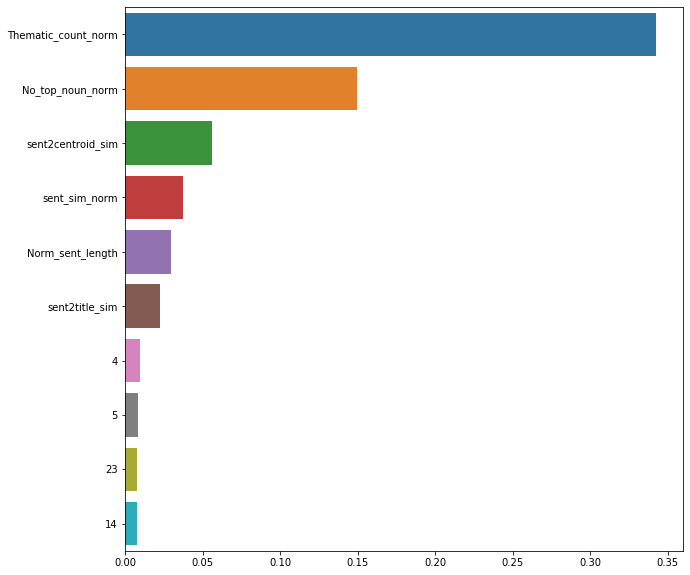

In [645]:
# Plotting the top 10 features in a horizontal bar chart - 
plt.figure(figsize=(10,10))
sns.barplot(x =feature_imp.sort_values(ascending = False).values[:10], y =feature_imp.sort_values(ascending = False).index[:10] )
plt.show()

#### Important features - 
From the plot shown above, we get a fair idea of the most important features of the data set. Almost all the extracted features are sitting at the top of the list. The vector dimensions have low amount of significance, which means the word2vec model did not perform well. Small number of words in corpora could be one of the reasons, also number of the dimensions can be tweaked as well . Also , pretrained model such as GLOVE can be used to further imporve the performance. 
Also different complex models and ensembles can be deployed to get more sophisticated results.  

### Preparing functions to apply predictions on individual test files - 

#### Handling a single test file - 

In [587]:
def prepare_test_file(path):  
    
    sent=[]
    f = open(path)
    n = ""
    for line in f: 
        n += line
    
    sent.append(n)
    
    return sent
    
    

In [588]:
# Function to store sentence wise titles - (Input similar to read_data func) for test file 

def read_data_summary_test(path):
  
    summary_dict = {}
    sent=''
    ad= 1
    f = open(path)
    #n = []
    for line in f: 
        sent = sent+line
        
        
    summary_dict[int(ad)] = [re.sub('"','',i) for i in sent.split(".") if i !='']
    
    return (summary_dict)

In [613]:
def operations(num_features,path_test,path_summary,word2vec_model,model_features,classifier):
    
    summary_dict_test = read_data_summary_test(path_summary)
    
    
    test_sent = prepare_test_file(path_test)
    
    them_dict_test,token_dict_test,word_count_dict_test = token_func(test_sent)  
    
    main_data_test,sent_count_dict_test= create_dataframe(test_sent,summary_dict_test)
    
    remove_null(main_data_test,sent_count_dict_test)
    
    top_noun_dict_test= top_nouns(token_dict_test)
    
    
    features_(main_data_test,sent_count_dict_test)
    
    
    w2v_feature_array = averaged_word_vectorizer(corpus=main_data_test['Sent_tokens'], model=word2vec_model,   #function to get vectors
                                             num_features=num_features)
    vector_df_test= pd.DataFrame(w2v_feature_array)
    
    
    main_data_test = main_data_test.merge(vector_df_test,left_index=True, right_index=True)
    
    centroid_dict,title_vector_dict = centroid_vector(main_data_test)
    
    sent_simlilarity(main_data_test)
    
    sent_similar_norm(main_data_test)
    
    main_data_test.reset_index(inplace=True,drop=True)
    main_data_test =main_data_test.fillna(0)
    
    X = main_data_test[model_features] 
    X.drop('Summary',axis=1,inplace=True)
    X = X.fillna(0)
    
    predictions = classifier.predict(X)
    
    show_data = main_data_test[['Sentence','Summary']]
    show_data['Prediction'] = predictions
    
    return (show_data)
    
    
    
    

#### Checking the developed functions using a sample file- 

In [600]:
path_test = "BBC News Summary/BBC News Summary/News Articles/business/013.txt"
path_summary ="BBC News Summary/BBC News Summary/Summaries/business/013.txt"
model_features = [i for i in main_data_sport.columns if i not in ['Sentence','Title','Sentence_len',
                                                                 'Sent_no','Sent_tokens','Thematic_count'] ]

In [614]:
result_data = operations(path_test =path_test,path_summary=path_summary ,word2vec_model =word2vec ,num_features=100,
                         model_features = model_features,classifier=grid_rf)

In [615]:
result_data.shape

(14, 3)

#### Result data frame obtained after using the pretrained model for predictions- 

In [616]:
result_data

,Sentence,Summary,Prediction
0,"Struggling Japanese car maker Mitsubishi Motors has struck a deal to supply French car maker Peugeot with 30,000 sports utility vehicles (SUV)",1,1.0
1,"The two firms signed a Memorandum of Understanding, and say they expect to seal a final agreement by Spring 2005",0,0.0
2,"The alliance comes as a badly-needed boost for loss-making Mitsubishi, after several profit warnings and poor sales",0,0.0
3,The SUVs will be built in Japan using Peugeot's diesel engines and sold mainly in the European market,0,0.0
4,"Falling sales have left Mitsubishi Motors with underused capacity, and the production deal with Peugeot gives it a chance to utilise some of it",1,1.0
5,"In January, Mitsubishi Motors issued its third profits warning in nine months, and cut its sales forecasts for the year to March 2005",1,0.0
6,"Its sales have slid 41% in the past year, catalysed by the revelation that the company had systematically been hiding records of faults and then secretly repairing vehicles",0,0.0
7,"As a result, the Japanese car maker has sought a series of financial bailouts",1,1.0
8,"Last month it said it was looking for a further 540bn yen ($5.2bn; Â£2.77bn) in fresh financial backing, half of it from other companies in the Mitsubishi group",0,0.0
9,"US-German carmaker DaimlerChrylser, a 30% shareholder in Mitsubishi Motors, decided in April 2004 not to pump in any more money",0,0.0


In [640]:
result_data.to_csv('business_013.csv')

#### END OF FILE !!